In [115]:
import cirq
import matplotlib.pyplot as plt

In [116]:
k=8
toBinary= lambda x,size:bin(x)[2:].zfill(size)
toDecimal= lambda binary_num: int(binary_num, 2)

In [117]:
qubits=cirq.NamedQubit.range(k,prefix='q')
circuit=cirq.Circuit()
sim=cirq.Simulator()
indexQubit=None
auxqubits=cirq.NamedQubit.range(2,prefix="aux")

In [118]:
def decodeValueQubits(a):
    power = 0
    while 2 ** power < len(a):
        power += 1
    return power

In [119]:
def controlState(ctrl_state):#for all No of Superposition  State
  global indexQubit
  intermediate_circuit=cirq.Circuit()
  for j,data in enumerate(ctrl_state):
        if data=='0':
          intermediate_circuit.append(cirq.X(indexQubit[j]))
  return intermediate_circuit

In [120]:
def encodeToQubits(value):#encoding bit value to Qubit state
  binaryState=toBinary(x=value,size=k)
  intermediate_circuit=cirq.Circuit()
  for i, data in enumerate(binaryState):
    if data =='1':
      intermediate_circuit.append(cirq.CX(auxqubits[0],qubits[i]))

  return intermediate_circuit

In [121]:
def bitToQubit(a):#E-NEQR method
    global circuit
    global indexQubit
    n=decodeValueQubits(a)
    indexQubit = cirq.NamedQubit.range(n,prefix='index')
    circuit.append(cirq.H.on_each(indexQubit))
    for i,value in enumerate(a):
      ctrl_state=toBinary(x=i,size=n)
      circuit=circuit+controlState(ctrl_state) #creating control state
      circuit.append(cirq.X(auxqubits[0]).controlled_by(*indexQubit))
      circuit=circuit+encodeToQubits(value)
      circuit.append(cirq.X(auxqubits[0]).controlled_by(*indexQubit))
      circuit=circuit+controlState(ctrl_state) # distroying control state

Using E-NEQR like method but instead of 2d array using 1d array as we are dealing with list

upper limit of data is 2^k.  
length of list must be in power of 2.
limitation of ENEQR

However this method doesn't allows 0 as final state even if 0 is supplied

In [164]:
a=[1,24,33,47,5,100,101,23,255,80,11,17,29,45,67,99] #
circuit=cirq.Circuit()
bitToQubit(a)#for generating Entangled state from bits using E-NEQR like Circuit
print(circuit)

aux0: ─────────────X───@───X───────────X───@───@───X───────────X───@───@───X───────────X───@───@───@───@───@───X───────────X───@───@───X───────────X───@───@───@───X───────────X───@───@───@───@───X───────────X───@───@───@───@───X───────────X───@───@───@───@───@───@───@───@───X───────────X───@───@───X───────────X───@───@───@───X───────────X───@───@───X───────────X───@───@───@───@───X───────────X───@───@───@───@───X───────────X───@───@───@───X───────X───@───@───@───@───X───
                   │   │   │           │   │   │   │           │   │   │   │           │   │   │   │   │   │   │           │   │   │   │           │   │   │   │   │           │   │   │   │   │   │           │   │   │   │   │   │           │   │   │   │   │   │   │   │   │   │           │   │   │   │           │   │   │   │   │           │   │   │   │           │   │   │   │   │   │           │   │   │   │   │   │           │   │   │   │   │       │   │   │   │   │   │
index0: ───H───X───@───┼───@───X───X───@───┼───┼───

In [165]:
def oddToEven():# if LSb qubit is in 1 state then it is shifted to 0 state
  global circuit
  circuit.append(cirq.X(auxqubits[1]).controlled_by(qubits[7]))
  circuit.append(cirq.X(qubits[7]).controlled_by(auxqubits[1]))

  #checking if output has 0. If has Zero its then shifted to 2
  circuit.append(cirq.X.on_each(qubits))
  circuit.append(cirq.X(auxqubits[0]).controlled_by(*qubits))
  circuit.append(cirq.X(qubits[k-2]).controlled_by(auxqubits[0]))
  circuit.append(cirq.X.on_each(qubits))

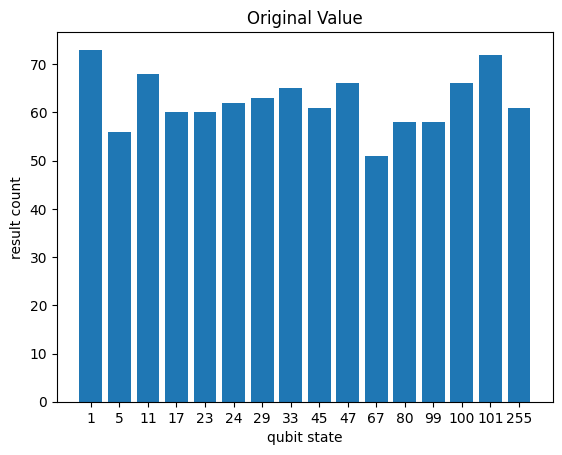

In [166]:
circuit.append(cirq.measure(qubits,key='measure_all'))
result = sim.run(circuit, repetitions=1000)
custom_histogram = result.histogram(key = 'measure_all')

cirq.plot_state_histogram(custom_histogram, plt.subplot(),title="Original Value")
plt.show()

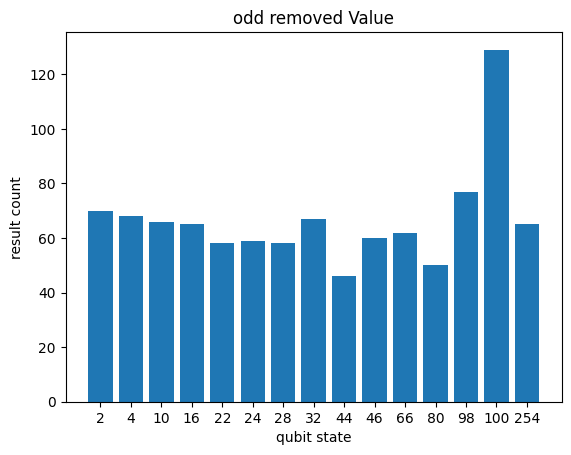

In [167]:
circuit=cirq.Circuit()
bitToQubit(a)
oddToEven()
circuit.append(cirq.measure(qubits,key='measure_all'))
result = sim.run(circuit, repetitions=1000)
custom_histogram = result.histogram(key = 'measure_all')

cirq.plot_state_histogram(custom_histogram, plt.subplot(),title="odd removed Value")
plt.show()